# Imports and Prepwork

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 62.2 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


# df.head

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Genomic Correlates of Immune-Cell Infiltrates ...,Large-scale genomic characterization of tumors...,[BIOC],[],[1300],[Large-scale cancer sequencing efforts have ad...,[Whole-exome sequencing of 619 colorectal canc...
1,A detailed clinical study of pain in 1957 part...,Introduction: The causes of pain in early/mode...,"[MEDI, NEUR]","[Central sensitization, Musculoskeletal, Nonmo...","[2717, 2728, 2808]",[Chronic pain affects 60–80% of Parkinson's di...,[Pain is common in early/moderate PD and impai...
2,Quantitative determination of major alkaloids ...,Chinoline alkaloids found in Cinchona bark sti...,"[BIOC, CHEM]","[Chinoline alkaloids, Cinchona bark, Cinchona ...","[1303, 1602, 1605]","[Cinchonae cortex, which originates from sever...",[Six chinoline alkaloids from Cinchona bark we...
3,Eye region surface temperature dynamics during...,Reactions to acute stressors are critical for ...,"[NEUR, PSYC]","[Avian, Bird, Homeostasis, Infrared thermograp...","[2802, 3205]","[Stress challenges an organism's homeostasis, ...",[We used thermal imaging (TI) to infer acute p...
4,"Combination of bone marrow aspirate, cancellou...",Introduction: Nonunion due to a critical-sized...,[MEDI],"[Bone marrow aspirate, Case series, Critical-s...",[2746],[A bone defect of large size is common and may...,[Critical-sized bone defect remains a challeng...


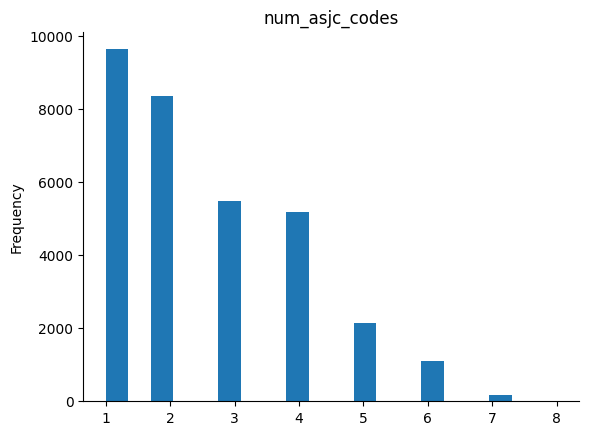

In [ ]:
# @title num_asjc_codes

from matplotlib import pyplot as plt
train_df['num_asjc_codes'].plot(kind='hist', bins=20, title='num_asjc_codes')
plt.gca().spines[['top', 'right',]].set_visible(False)

# EDA Section

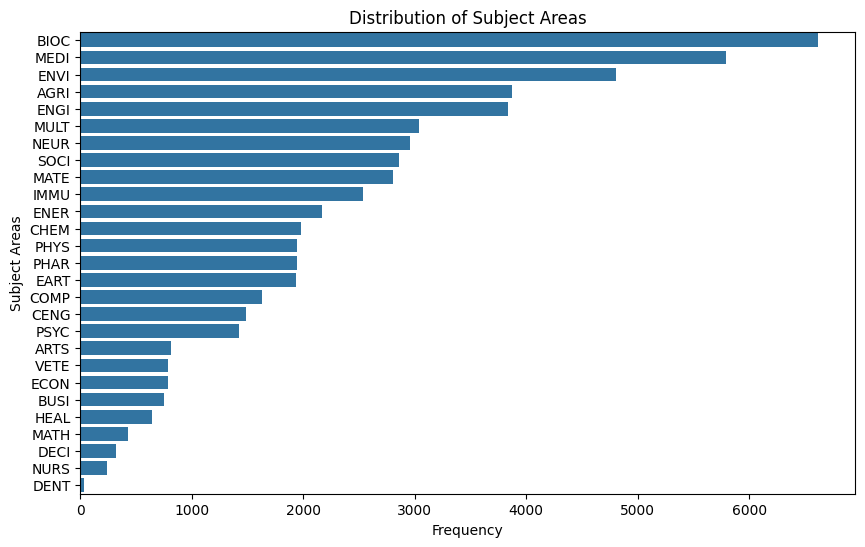

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df['subjareas']' is a list of lists of subject areas
subjareas_flattened = [area for sublist in train_df['subjareas'] for area in sublist]
subjareas_count = Counter(subjareas_flattened)

# Sorting the Counter by values in descending order
sorted_subjareas = dict(sorted(subjareas_count.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_subjareas.values()), y=list(sorted_subjareas.keys()))
plt.title('Distribution of Subject Areas')
plt.xlabel('Frequency')
plt.ylabel('Subject Areas')
plt.show()

<ipython-input-28-f4e51e525d4c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='ASJC Code', data=asjc_df_sorted, palette='viridis')


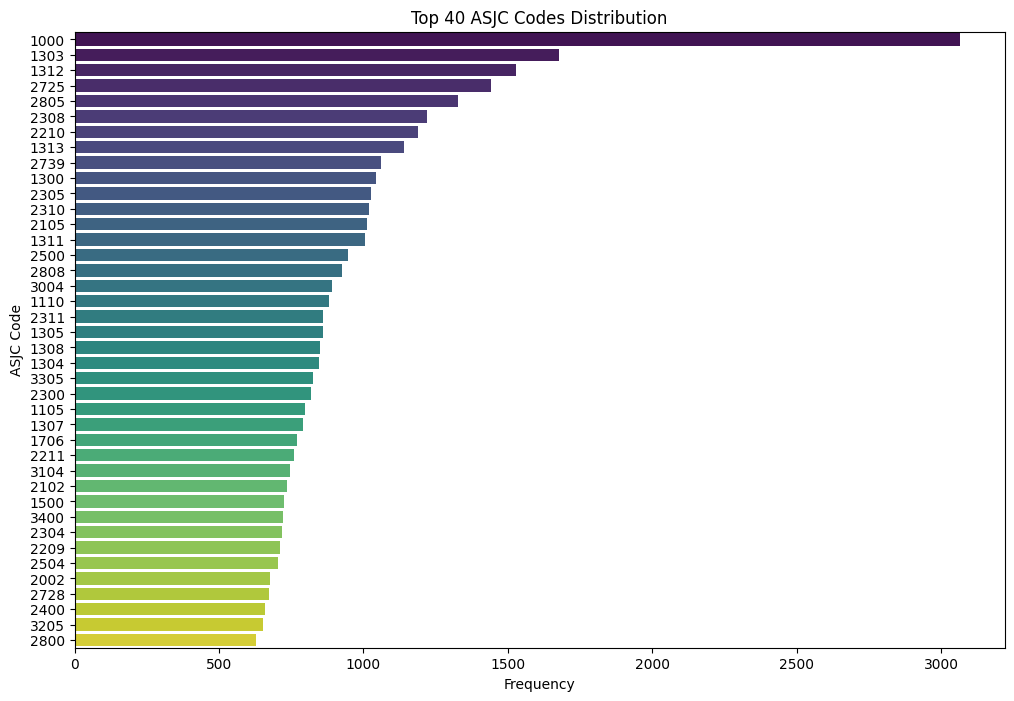

<ipython-input-28-f4e51e525d4c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_asjc_codes', data=train_df, palette='coolwarm')


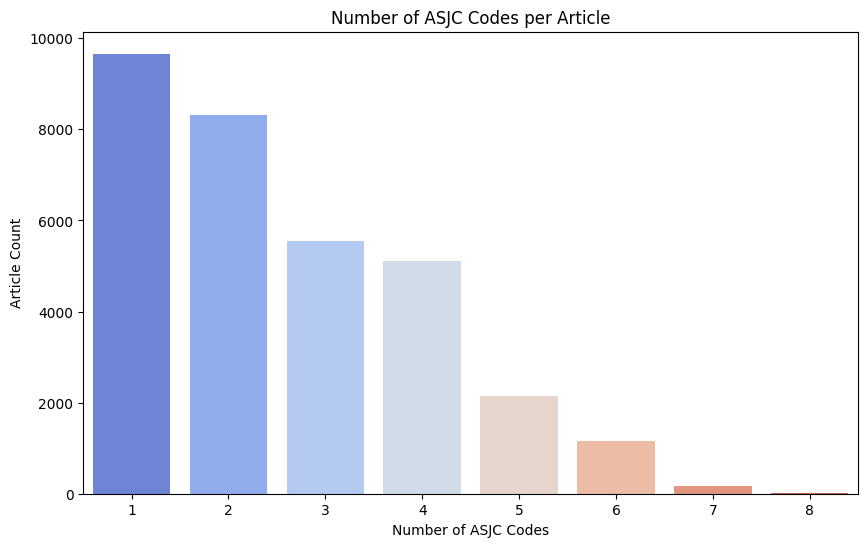

In [ ]:
#and asjc too

asjc_flattened = [code for sublist in train_df['asjc'] for code in sublist]
asjc_count = Counter(asjc_flattened)
asjc_df = pd.DataFrame(asjc_count.items(), columns=['ASJC Code', 'Frequency'])

plt.figure(figsize=(12, 8))
asjc_df_sorted = asjc_df.sort_values('Frequency', ascending=False).head(40)
sns.barplot(x='Frequency', y='ASJC Code', data=asjc_df_sorted, palette='viridis')
plt.title('Top 40 ASJC Codes Distribution')
plt.xlabel('Frequency')
plt.ylabel('ASJC Code')
plt.show()

train_df['num_asjc_codes'] = train_df['asjc'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
sns.countplot(x='num_asjc_codes', data=train_df, palette='coolwarm')
plt.title('Number of ASJC Codes per Article')
plt.xlabel('Number of ASJC Codes')
plt.ylabel('Article Count')
plt.show()

In [ ]:
pip install pandas matplotlib seaborn

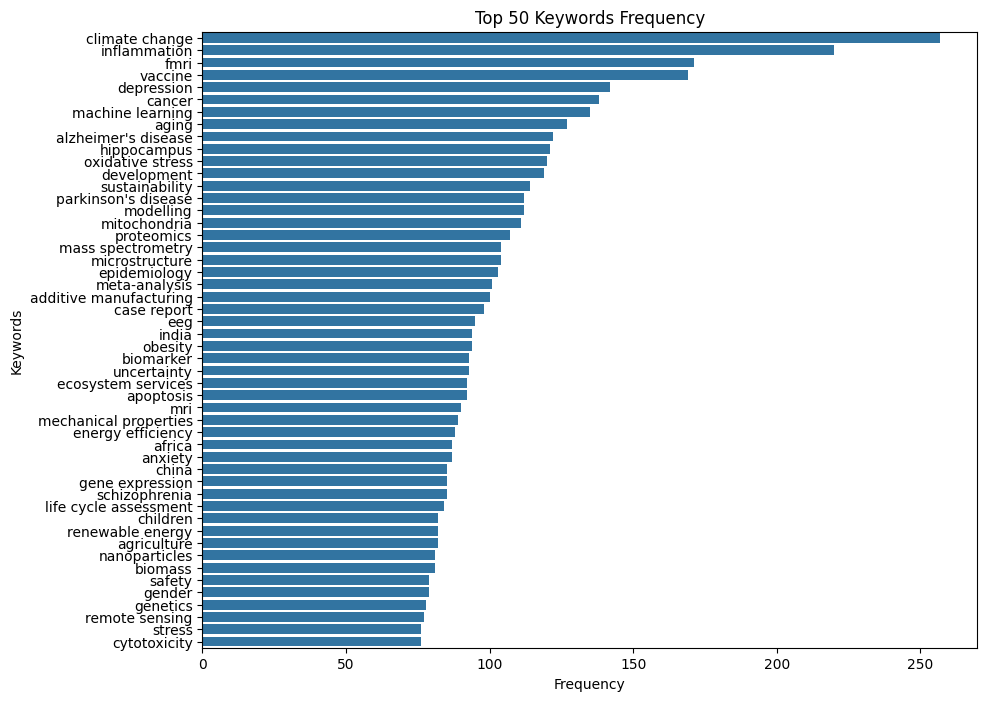

In [ ]:
#top keywords
keywords_flattened = [keyword.lower() for sublist in train_df['keywords'].dropna() for keyword in sublist]

keyword_counts = Counter(keywords_flattened)

most_common_keywords = keyword_counts.most_common(50)

plt.figure(figsize=(10, 8))
sns.barplot(x=[count for keyword, count in most_common_keywords], y=[keyword for keyword, count in most_common_keywords])
plt.title('Top 50 Keywords Frequency')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()
